In [ ]:
import cv2
from matplotlib import pyplot as plt
import os
import yaml

from detection.shapes import Rectangle
from detection.litter_detection import merge_rectangles

In [21]:
def draw_yolo_boxes(image_path, label_path, class_names, filter_class=-1, palette=[tuple(int(c * 255) for c in color) for color in plt.cm.tab20.colors]):
    """ Draw bounding boxes in yolo format on image"""
    print("image:", image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_height, image_width = image.shape[:2]

    annots = []
    # Open and parse YOLO label file
    with open(label_path, "r") as f:
        for line in f:
            class_id, center_x, center_y, width, height = map(float, line.split())
            if filter_class != -1 and class_id != filter_class:
                continue

            class_id = int(class_id)

            # Convert YOLO format to pixel values
            x1 = int((center_x - (width / 2)) * image_width)
            x2 = int((center_x + (width / 2)) * image_width)
            y1 = int((center_y - (height / 2)) * image_height)
            y2 = int((center_y + (height / 2)) * image_height)
                    
            annots.append(Rectangle(x1, y1, x2, y2, class_names[class_id]))
            # Draw bounding box and label
            color = palette[class_id%20] if type(palette) is list else palette

            cv2.rectangle(image, (x1, y1), (x2,y2), color, 5)
            # cv2.putText(image, class_names[class_id], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)

    # Display the image
    plt.imshow(image)
    plt.show()

    return annots

image: /home/anna/Datasets/created/piles_m13_random/images/train/bags_9_0018_10_RGB.png


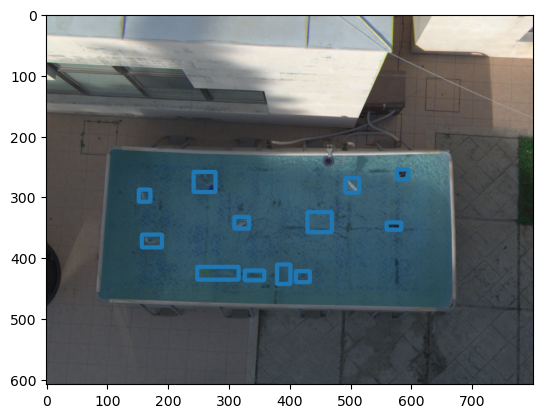

In [32]:
path = "/home/anna/Datasets/created/piles_m13_random"
filename = "bags_9_0018_10_RGB"

with open(f"{path}/data_config.yaml", "r") as file:
    config = yaml.safe_load(file)

annots = draw_yolo_boxes(f"{path}/images/train/{filename}.png", 
                f"{path}/labels/train/{filename}.txt",
                config["names"])

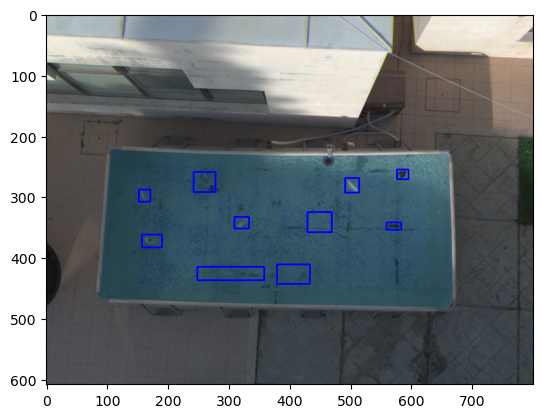

In [34]:
piles = merge_rectangles(annots, 15)

image = cv2.imread(f"{path}/images/train/{filename}.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for pile in piles:
    pile.draw(image)

plt.imshow(image)
plt.show()